In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# **Dataset Info**
## Observed CMAP precipitation data.
## NETCDF file format found in the CMAP database on Cola server.
## *by Jake Campbell, Assignment 1a, 1b, and 1c.*

In [2]:
path='/shared/obs/precip/cmap/monthly/precip.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 491)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-11-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1912
    history:        update 12/2019 V1912
    data_modified:  2019-12-12

In [17]:
ds_mean=ds['precip']

<xarray.DataArray 'precip' (time: 491, lat: 72, lon: 144)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [0.06, 0.06, ..., 0.05, 0.05],
        [0.08, 0.07, ..., 0.08, 0.07]],

       [[ nan,  nan, ...,  nan,  nan],
        [0.66, 0.69, ..., 0.65, 0.66],
        ...,
        [0.01, 0.01, ..., 0.01, 0.01],
        [0.01, 0.01, ..., 0.01, 0.01]],

       ...,

       [[ nan,  nan, ...,  nan,  nan],
        [0.42, 0.48, ..., 0.57, 0.44],
        ...,
        [0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]],

       [[ nan,  nan, ...,  nan,  nan],
        [0.12, 0.11, ..., 0.12, 0.1 ],
        ...,
        [0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-11-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   59.08]

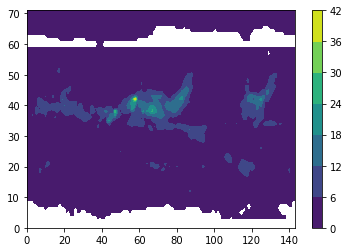

In [18]:
plt.contourf(ds_mean[0,:,:])
plt.colorbar()
ds_mean

Text(0.5, 1.0, 'CMAP Precipitation Data Averaged Per Day')

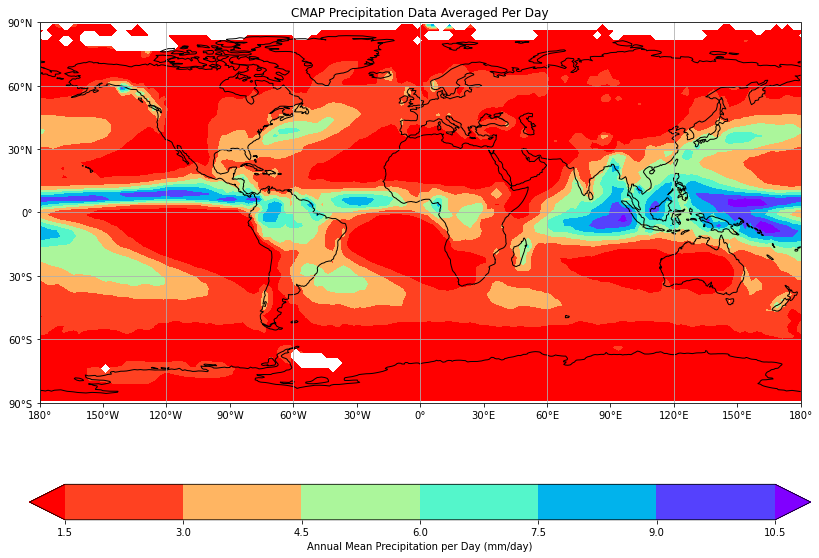

In [32]:
import cartopy.crs as zrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

ds_mean=ds.mean(dim='time')

fig = plt.figure(figsize=(20,10))

# set the axis using the specified map
#Robinson map CANNOT show xticks and yticks, so no LAT/LON labels
ax=plt.axes(projection=zrs.PlateCarree())

# Add Cyclic point
data=ds_mean['precip']
data, lon=add_cyclic_point(data,coord=ds_mean['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_mean['lat'],
            data,
            transform=zrs.PlateCarree(),
           cmap='rainbow_r',extend='both')
# cmap line adds color map

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
# Define the xticks for longtitude
ax.set_xticks(np.arange(-180,181,30),crs=zrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30),crs=zrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Annual Mean Precipitation per Day (mm/day)')

# Add title
plt.title('CMAP Precipitation Data Averaged Per Day')

In [72]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))
ds_wus=ds.sel(lon=slice(360-150,360-90),lat=slice(50,20))

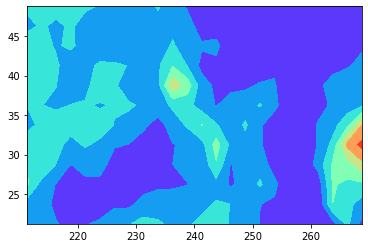

In [73]:
plt.contourf(ds_wus['lon'],ds_wus['lat'],ds_wus['precip'][0,:,:],cmap='rainbow')

Text(0.5, 1.0, 'CMAP Precipitation Data Averaged Per Day')

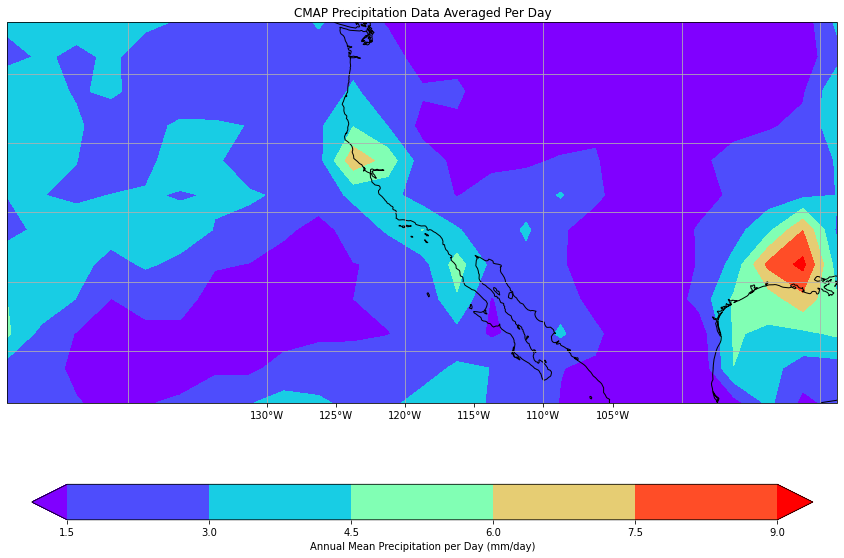

In [74]:
import cartopy.crs as zrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

fig = plt.figure(figsize=(20,10))

# set the axis using the specified map
#Robinson map CANNOT show xticks and yticks, so no LAT/LON labels
ax=plt.axes(projection=zrs.PlateCarree())

# Add Cyclic point
data=ds_wus['precip'][0,:,:]
data, lon=add_cyclic_point(data,coord=ds_wus['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_wus['lat'],
            data,
            transform=zrs.PlateCarree(),
           cmap='rainbow',extend='both')
# cmap line adds color map

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
# Define the xticks for longtitude
ax.set_xticks(np.arange(-130,-100,5),crs=zrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(50,30,5),crs=zrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Annual Mean Precipitation per Day (mm/day)')

# Add title
plt.title('CMAP Precipitation Data Averaged Per Day')